# Machine Learning CUTe

####By Jiban Jyoti Panda and Kavitha A

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from multiprocessing import Process
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
#import squarify # for tree maps
%matplotlib inline
init_notebook_mode(connected=True)

In [2]:
path = os.getcwd()
os.chdir(path)

#Importing Train and Test Data:-

In [3]:
Finance_train = pd.read_csv("train.csv",sep=',',na_values="NA")
Finance_test =  pd.read_csv("test.csv",sep=',',na_values="NA")

#Getting to know the data:-
   Descrptions and Data_types:

In [4]:
print("Number of rows in train data are :",Finance_train.shape[0])
print("Number of columns in train data are :",Finance_train.shape[1])
print("Number of rows in test data are :",Finance_test.shape[0])
print("Number of columns in test data are :",Finance_test.shape[1])

Number of rows in train data are : 31283
Number of columns in train data are : 66
Number of rows in test data are : 6451
Number of columns in test data are : 65


In [5]:
Finance_train.describe()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,31283.000000,31276.000000,31276.000000,31276.000000,31181.000000,3.122000e+04,31276.000000,31276.000000,31210.000000,31279.000000,...,3.118200e+04,31277.000000,3.121500e+04,31277.000000,2.971300e+04,31210.000000,3.118200e+04,31181.000000,30682.000000,31283.000000
mean,15642.000000,0.051612,0.551159,0.151249,7.321993,-1.706215e+02,-0.011735,0.120577,14.379693,2.783840,...,-3.637422e+01,-0.007774,4.067219e+01,1.677983,5.462892e+02,15.227988,1.640595e+03,9.656775,81.529420,0.048301
std,9030.768572,1.748230,4.510523,3.754494,347.736044,2.392279e+04,5.489446,6.045041,562.011982,69.973455,...,6.276744e+03,13.989982,6.283661e+03,143.470467,3.792399e+04,219.335078,1.515043e+05,142.374215,2726.762529,0.214405
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,7821.500000,0.003360,0.269397,0.022146,1.051000,-4.845300e+01,0.000000,0.005758,0.428970,1.018100,...,8.919150e-03,0.014690,8.751350e-01,0.000000,5.533000e+00,4.523400,4.205425e+01,3.099200,2.180375,0.000000
50%,15642.000000,0.049686,0.472685,0.196770,1.571000,-7.813950e-01,0.000000,0.059707,1.068650,1.196700,...,5.306150e-02,0.120460,9.507600e-01,0.005453,9.763000e+00,6.652750,7.120750e+01,5.090700,4.289950,0.000000
75%,23462.500000,0.130523,0.689240,0.403983,2.797800,5.076850e+01,0.087633,0.151895,2.606850,2.060550,...,1.294750e-01,0.286740,9.927900e-01,0.234840,2.014500e+01,10.417750,1.170400e+02,8.618600,9.788950,0.000000
max,31283.000000,94.280000,480.730000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [6]:
Finance_test.describe()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,6451.000000,6451.000000,6451.000000,6451.000000,6429.000000,6.438000e+03,6451.000000,6451.000000,6437.000000,6449.000000,...,6.450000e+03,6439.000000,6451.000000,6445.000000,6451.000000,6146.000000,6436.000000,6.439000e+03,6429.000000,6341.000000
mean,39779.000000,-0.019729,0.671916,0.035850,3.540007,1.585019e+02,-0.208878,0.000546,7.062295,2.007925,...,6.088847e+03,0.023130,0.034450,3.932018,0.530441,283.327769,13.902278,-4.418735e+01,9.092290,46.106849
std,1862.387625,5.853072,7.881294,7.877168,20.957010,2.054143e+04,10.400030,5.873490,230.439886,21.260431,...,4.220430e+04,7.049784,8.066195,197.802787,21.750395,8061.380944,107.694529,3.018073e+04,72.770389,742.918601
min,36554.000000,-463.890000,0.000000,-445.910000,-0.403110,-6.341400e+05,-486.820000,-463.890000,-3.735100,-0.612590,...,-4.928300e+05,-477.080000,-469.050000,-1.632400,-152.090000,0.000000,-0.014534,-2.336500e+06,-1.543200,-10677.000000
25%,38166.500000,0.003772,0.271310,0.017369,1.038700,-4.988150e+01,0.000000,0.005991,0.427480,1.019700,...,1.958850e+01,0.009892,0.015050,0.878160,0.000000,5.680450,4.549600,4.182800e+01,3.109900,2.166400
50%,39779.000000,0.050048,0.471450,0.194430,1.558600,-1.428250e+00,0.000000,0.059782,1.058700,1.192800,...,1.098150e+03,0.052082,0.117930,0.951960,0.009292,10.058000,6.719050,7.049000e+01,5.145700,4.297500
75%,41391.500000,0.127275,0.687835,0.395880,2.737500,4.848250e+01,0.093908,0.147620,2.589000,2.104000,...,4.880725e+03,0.124810,0.282195,0.992470,0.249175,20.720250,10.660000,1.168050e+02,8.633600,10.024000
max,43004.000000,20.482000,446.910000,17.708000,1017.800000,1.250100e+06,244.310000,38.618000,18148.000000,1704.800000,...,1.634200e+06,293.150000,147.190000,15459.000000,1661.000000,457320.000000,7123.000000,4.513800e+05,5662.400000,28999.000000


In [7]:
Finance_test.insert(65,"target",0)


In [8]:
Finance_test.describe()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,6451.000000,6451.000000,6451.000000,6451.000000,6429.000000,6.438000e+03,6451.000000,6451.000000,6437.000000,6449.000000,...,6439.000000,6451.000000,6445.000000,6451.000000,6146.000000,6436.000000,6.439000e+03,6429.000000,6341.000000,6451.0
mean,39779.000000,-0.019729,0.671916,0.035850,3.540007,1.585019e+02,-0.208878,0.000546,7.062295,2.007925,...,0.023130,0.034450,3.932018,0.530441,283.327769,13.902278,-4.418735e+01,9.092290,46.106849,0.0
std,1862.387625,5.853072,7.881294,7.877168,20.957010,2.054143e+04,10.400030,5.873490,230.439886,21.260431,...,7.049784,8.066195,197.802787,21.750395,8061.380944,107.694529,3.018073e+04,72.770389,742.918601,0.0
min,36554.000000,-463.890000,0.000000,-445.910000,-0.403110,-6.341400e+05,-486.820000,-463.890000,-3.735100,-0.612590,...,-477.080000,-469.050000,-1.632400,-152.090000,0.000000,-0.014534,-2.336500e+06,-1.543200,-10677.000000,0.0
25%,38166.500000,0.003772,0.271310,0.017369,1.038700,-4.988150e+01,0.000000,0.005991,0.427480,1.019700,...,0.009892,0.015050,0.878160,0.000000,5.680450,4.549600,4.182800e+01,3.109900,2.166400,0.0
50%,39779.000000,0.050048,0.471450,0.194430,1.558600,-1.428250e+00,0.000000,0.059782,1.058700,1.192800,...,0.052082,0.117930,0.951960,0.009292,10.058000,6.719050,7.049000e+01,5.145700,4.297500,0.0
75%,41391.500000,0.127275,0.687835,0.395880,2.737500,4.848250e+01,0.093908,0.147620,2.589000,2.104000,...,0.124810,0.282195,0.992470,0.249175,20.720250,10.660000,1.168050e+02,8.633600,10.024000,0.0
max,43004.000000,20.482000,446.910000,17.708000,1017.800000,1.250100e+06,244.310000,38.618000,18148.000000,1704.800000,...,293.150000,147.190000,15459.000000,1661.000000,457320.000000,7123.000000,4.513800e+05,5662.400000,28999.000000,0.0


In [9]:
Finance_train.dtypes

ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
           ...   
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

In [10]:
Finance_test.dtypes

ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
           ...   
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

#Function for counting Unique values

In [11]:
def Count_unique_values(df):
    for i in df:
        print(i,":",df[i].nunique())

In [12]:
Count_unique_values(Finance_train)

ID : 31283
Attr1 : 27955
Attr2 : 26671
Attr3 : 27814
Attr4 : 23614
Attr5 : 29453
Attr6 : 17519
Attr7 : 27930
Attr8 : 27598
Attr9 : 19360
Attr10 : 26735
Attr11 : 27662
Attr12 : 28755
Attr13 : 27260
Attr14 : 27930
Attr15 : 28217
Attr16 : 28208
Attr17 : 22618
Attr18 : 27930
Attr19 : 28206
Attr20 : 25882
Attr21 : 15487
Attr22 : 25291
Attr23 : 28239
Attr24 : 27507
Attr25 : 27580
Attr26 : 28080
Attr27 : 25448
Attr28 : 28302
Attr29 : 19251
Attr30 : 27219
Attr31 : 28052
Attr32 : 25743
Attr33 : 26482
Attr34 : 28179
Attr35 : 27949
Attr36 : 22619
Attr37 : 16347
Attr38 : 26062
Attr39 : 28210
Attr40 : 28309
Attr41 : 27560
Attr42 : 25552
Attr43 : 23525
Attr44 : 26424
Attr45 : 27445
Attr46 : 26141
Attr47 : 25969
Attr48 : 28350
Attr49 : 28512
Attr50 : 25037
Attr51 : 26070
Attr52 : 24628
Attr53 : 25535
Attr54 : 23324
Attr55 : 29076
Attr56 : 27959
Attr57 : 27735
Attr58 : 18271
Attr59 : 16463
Attr60 : 25537
Attr61 : 26200
Attr62 : 25962
Attr63 : 26380
Attr64 : 26866
target : 2


In [13]:
Count_unique_values(Finance_test)

ID : 6451
Attr1 : 6264
Attr2 : 6218
Attr3 : 6278
Attr4 : 6029
Attr5 : 6347
Attr6 : 3753
Attr7 : 6274
Attr8 : 6271
Attr9 : 5410
Attr10 : 6236
Attr11 : 6234
Attr12 : 6333
Attr13 : 6241
Attr14 : 6274
Attr15 : 6308
Attr16 : 6302
Attr17 : 5942
Attr18 : 6274
Attr19 : 6287
Attr20 : 5968
Attr21 : 4643
Attr22 : 5716
Attr23 : 6262
Attr24 : 6177
Attr25 : 6269
Attr26 : 6301
Attr27 : 5518
Attr28 : 6239
Attr29 : 5720
Attr30 : 6226
Attr31 : 6257
Attr32 : 6111
Attr33 : 6173
Attr34 : 6285
Attr35 : 6282
Attr36 : 5970
Attr37 : 3656
Attr38 : 6192
Attr39 : 6256
Attr40 : 6301
Attr41 : 6171
Attr42 : 5740
Attr43 : 6000
Attr44 : 6189
Attr45 : 5995
Attr46 : 6178
Attr47 : 5925
Attr48 : 6232
Attr49 : 6227
Attr50 : 6125
Attr51 : 6171
Attr52 : 6034
Attr53 : 6074
Attr54 : 5920
Attr55 : 6370
Attr56 : 6239
Attr57 : 6248
Attr58 : 5490
Attr59 : 3666
Attr60 : 5943
Attr61 : 6181
Attr62 : 6168
Attr63 : 6204
Attr64 : 6132
target : 1


#Checking NA values:-

In [14]:
Finance_train.isnull().sum()

ID            0
Attr1         7
Attr2         7
Attr3         7
Attr4       102
Attr5        63
Attr6         7
Attr7         7
Attr8        73
Attr9         4
Attr10        7
Attr11       32
Attr12      102
Attr13      101
Attr14        7
Attr15       25
Attr16       74
Attr17       73
Attr18        7
Attr19      102
Attr20      101
Attr21     4251
Attr22        7
Attr23      101
Attr24      680
Attr25        7
Attr26       74
Attr27     2004
Attr28      601
Attr29        7
          ...  
Attr36        7
Attr37    13768
Attr38        7
Attr39      101
Attr40      102
Attr41      539
Attr42      101
Attr43      101
Attr44      101
Attr45     1566
Attr46      102
Attr47      207
Attr48        8
Attr49      101
Attr50       73
Attr51        7
Attr52      212
Attr53      601
Attr54      601
Attr55        0
Attr56      101
Attr57        6
Attr58       68
Attr59        6
Attr60     1570
Attr61       73
Attr62      101
Attr63      102
Attr64      601
target        0
Length: 66, dtype: int64

#Corelation plot:-

In [15]:
trace= go.Box(
    y=Finance_train['Attr4'],
    name = 'Box1',
    marker = dict(
        color = '#AA0505',
    )
)

data = [trace]
layout = go.Layout(title = "Boxplot of 2 sets of random numbers")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [16]:
data = [go.Histogram(x=Finance_train['Attr4'],
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   # you can provide color in HEX format or rgb format, genrally programmers prefer HEX format as it is a single string value and easy to pass as a variable
    ))]
layout = go.Layout(title = "Histogram of {} random numbers".format(Finance_train.shape[0]))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [17]:
Finance_train.corr()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
ID,1.000000,0.001329,-0.004340,0.008308,0.003060,-0.008340,0.003968,-0.005370,0.007026,-0.010599,...,0.006155,0.005398,-0.005942,-0.002936,-0.003980,-0.008124,-0.006999,-0.006467,-0.009227,0.001813
Attr1,0.001329,1.000000,-0.254073,0.117850,0.000709,0.015935,0.244123,0.081612,0.000191,-0.218203,...,0.000144,0.014932,-0.000457,-0.000558,0.000270,0.001861,-0.000496,0.009227,-0.018873,-0.016134
Attr2,-0.004340,-0.254073,1.000000,-0.822203,-0.001925,-0.074863,-0.870259,0.193065,-0.002949,-0.028567,...,-0.000397,-0.001050,0.000473,0.000998,0.000005,-0.002749,0.027622,-0.003330,-0.015894,0.014081
Attr3,0.008308,0.117850,-0.822203,1.000000,0.003324,0.090152,0.665321,0.039835,0.001839,-0.002707,...,0.000071,0.000886,-0.000135,-0.000494,0.000400,-0.003799,-0.033068,0.004817,-0.002123,-0.011296
Attr4,0.003060,0.000709,-0.001925,0.003324,1.000000,0.005244,-0.000119,0.000109,0.635410,-0.000461,...,0.000304,0.000095,-0.000315,-0.000273,0.001864,0.000607,-0.000621,0.039286,0.000066,-0.002123
Attr5,-0.008340,0.015935,-0.074863,0.090152,0.005244,1.000000,0.058639,0.004671,0.004680,0.001432,...,-0.000042,0.000117,0.000030,0.000082,0.000103,0.001016,-0.004433,0.001126,0.000307,-0.005834
Attr6,0.003968,0.244123,-0.870259,0.665321,-0.000119,0.058639,1.000000,-0.184944,0.000564,0.029749,...,0.000005,0.003660,-0.000043,-0.000079,-0.000114,0.001212,-0.023386,0.000448,0.043889,-0.010693
Attr7,-0.005370,0.081612,0.193065,0.039835,0.000109,0.004671,-0.184944,1.000000,-0.000140,0.691279,...,0.000108,0.004592,-0.000208,-0.000302,0.058896,0.249652,-0.000265,0.725204,0.202963,-0.006877
Attr8,0.007026,0.000191,-0.002949,0.001839,0.635410,0.004680,0.000564,-0.000140,1.000000,0.005222,...,0.000161,0.000153,-0.000164,-0.000298,0.000163,0.000771,-0.000278,0.041713,-0.000715,-0.002839
Attr9,-0.010599,-0.218203,-0.028567,-0.002707,-0.000461,0.001432,0.029749,0.691279,0.005222,1.000000,...,0.000232,0.000485,-0.000252,-0.000341,0.076316,0.333679,-0.000416,0.935525,0.261079,-0.002694


In [18]:
def plot_corr(df,size):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

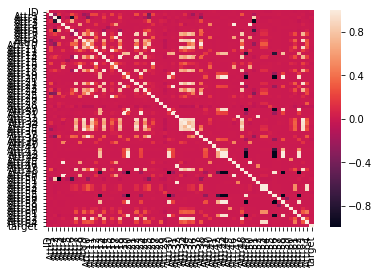

In [19]:
import seaborn as sns
corr = Finance_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
Finance_train.drop('ID',axis=1,inplace=True)
Finance_test.drop('ID',axis=1,inplace=True)
cat_cols = ['target']
num_cols = [i for i in Finance_train.columns.values if i not in cat_cols]


In [21]:
print("ID" in Finance_train.columns.values)
print("ID" in Finance_test.columns.values)

False
False


#Function for conversion of data types:-

In [22]:
def Convert_Category(df,cat_cols):
    for col in cat_cols:
        df[col] = df[col].astype('category')

In [23]:
Convert_Category(Finance_train,cat_cols)
Convert_Category(Finance_test,cat_cols)

In [24]:
Finance_train.select_dtypes(include='category').columns.values

array(['target'], dtype=object)

In [25]:
Finance_test.select_dtypes(include='category').columns.values

array(['target'], dtype=object)

#Function for imputing missing values:-

In [26]:
def impute(df,num_cols):
    imp_num = Imputer(missing_values='NaN', strategy='median', axis=0)
    df[num_cols] = pd.DataFrame(imp_num.fit_transform(df[num_cols]), columns=num_cols)
#     df[cat_cols] = df[cat_cols].replace('nan',np.NaN)
#     df[cat_cols] =pd.DataFrame(df[cat_cols].apply(lambda x:x.fillna(x.value_counts().index[0])))
    

In [27]:
impute(Finance_train,num_cols)
impute(Finance_test,num_cols)

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [28]:
print(Finance_train.isnull().sum())
print(Finance_test.isnull().sum())

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64
Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Att

#Function for standardization:-

In [29]:
def Standardize(df,num_cols):
    scaler = StandardScaler(with_mean=True, with_std=True).fit(df[num_cols])
    df = pd.DataFrame(scaler.transform(df[num_cols]),columns=num_cols)
    return df

In [30]:
Finance_train['target'].value_counts()/Finance_train.shape[0]

0    0.951699
1    0.048301
Name: target, dtype: float64

In [31]:
Finance_train.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.451850,0.311620,2.0469,10.23400,0.167680,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.246950,0.92586,0.18362,9.0895,8.8342,48.1720,7.5770,5.7725,0
1,0.005861,0.398580,0.197680,1.9390,9.57710,0.000000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.000000,0.79303,0.31271,6.2213,4.2785,78.4990,4.6497,1.6539,0
2,0.110600,0.161170,0.478940,7.5711,263.90000,0.000000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.131850,0.80748,0.10234,9.4499,3.3443,38.8670,9.3910,1.5272,0
3,0.063911,1.407300,-0.295950,0.5291,-46.28700,-0.714200,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.137300,1.01530,-1.67320,29.2710,14.1410,73.4580,4.9688,4.6785,0
4,0.131680,0.660310,0.441210,2.7098,-23.59600,-0.200070,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.387640,0.93881,1.18420,4.5462,15.1400,44.1010,8.2764,7.1014,0
5,0.254110,0.022149,0.696940,33.2270,86.64000,0.000000,0.254110,44.14900,1.97160,0.97785,...,0.122750,0.259860,0.87268,0.00000,6.8375,5.3717,4.0034,91.1710,7.0057,0
6,0.325890,0.072556,0.577620,9.0403,96.82400,0.000000,0.403660,12.78300,1.49160,0.92744,...,0.264550,0.351380,0.73129,0.00000,45.3300,9.6805,17.5800,20.7620,4.2551,0
7,0.001252,0.587030,-0.047195,0.9196,-124.00000,-0.068816,0.001252,0.70348,2.04740,0.41297,...,0.551420,0.003031,0.46775,0.00000,7.9752,7.3650,104.6500,3.4877,4.4493,0
8,-0.015104,0.236210,0.593250,3.9253,37.80600,0.000000,-0.015104,3.23360,1.21440,0.76379,...,-0.098839,-0.019775,1.01130,0.00000,2.6705,13.2400,60.9530,5.9883,5.9544,0
9,0.147420,0.367020,0.286830,2.3412,-0.80799,0.147420,0.182010,1.72460,1.10830,0.63298,...,0.097722,0.232900,0.90228,0.24198,7.1806,10.5760,37.3550,9.7712,4.1849,0


In [32]:
Finance_train_demo= Standardize(Finance_train,num_cols)
for i in num_cols:
    Finance_train[i] = Finance_train_demo[i]

In [33]:
Finance_train['target'].value_counts()/Finance_train.shape[0]

0    0.951699
1    0.048301
Name: target, dtype: float64

In [34]:
Finance_train.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.047917,-0.022016,0.042717,-0.015141,0.007553,0.032687,0.007787,-0.023400,-0.007550,-0.010179,...,0.005798,0.018208,-0.006319,-0.010415,-0.013806,-0.029094,-0.010494,-0.014527,-0.027504,0
1,-0.026173,-0.033828,0.012366,-0.015452,0.007526,0.002137,-0.018749,-0.022873,-0.025795,-0.006704,...,0.005829,0.000554,-0.006340,-0.009515,-0.013884,-0.049889,-0.010294,-0.035122,-0.029029,0
2,0.033746,-0.086469,0.087288,0.000772,0.018168,0.002137,0.002944,-0.016290,-0.030002,0.008781,...,0.005811,0.009980,-0.006337,-0.010981,-0.013796,-0.054153,-0.010556,-0.001765,-0.029076,0
3,0.007036,0.189838,-0.119128,-0.019513,0.005188,-0.127983,-0.006865,-0.026150,-0.025708,-0.076292,...,0.005783,-0.009261,-0.006304,-0.023358,-0.013260,-0.004870,-0.010327,-0.032877,-0.027909,0
4,0.045806,0.024206,0.077238,-0.013231,0.006138,-0.034314,0.001877,-0.024645,-0.009260,-0.023775,...,0.005803,0.028265,-0.006317,-0.003440,-0.013929,-0.000310,-0.010521,-0.009607,-0.027012,0
5,0.115845,-0.117295,0.145359,0.074673,0.010751,0.002137,0.022095,0.053087,-0.011606,0.017848,...,0.005805,0.019131,-0.006327,-0.011695,-0.013867,-0.044899,-0.010786,0.573584,-0.027048,0
6,0.156909,-0.106118,0.113575,0.005004,0.011177,0.002137,0.046837,-0.002789,-0.018466,0.014560,...,0.005828,0.025673,-0.006350,-0.011695,-0.012826,-0.025231,-0.010697,0.078234,-0.028066,0
7,-0.028810,0.007958,-0.052864,-0.018388,0.001937,-0.010400,-0.019740,-0.024308,-0.010522,-0.018996,...,0.005874,0.000771,-0.006392,-0.011695,-0.013836,-0.035800,-0.010121,-0.043297,-0.027994,0
8,-0.038167,-0.069830,0.117738,-0.009730,0.008707,0.002137,-0.022446,-0.019801,-0.022428,0.003886,...,0.005770,-0.000860,-0.006305,-0.011695,-0.013980,-0.008983,-0.010410,-0.025704,-0.027437,0
9,0.054810,-0.040826,0.036114,-0.014293,0.007091,0.028996,0.010166,-0.022489,-0.023944,-0.004646,...,0.005801,0.017203,-0.006322,-0.010008,-0.013858,-0.021143,-0.010566,0.000910,-0.028092,0


In [35]:
Finance_test.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,0.367980,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603,0
2,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,0.161630,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700,0
3,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,0.439630,...,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525,0
4,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,0.069453,...,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551,0
5,0.140900,0.75560,0.338860,1.63880,-11.094,0.367620,0.140900,0.323440,1.05080,0.244400,...,0.048331,0.576540,0.95167,0.921160,6.2170,7.8531,75.444,4.8380,19.6410,0
6,0.013079,0.75841,-0.060128,0.90444,-58.080,0.069955,0.012298,0.299580,0.99307,0.227210,...,-0.006983,0.057565,1.00700,0.568570,7.3493,11.7850,91.453,3.9911,5.8280,0
7,0.124460,0.41949,0.438150,2.04450,14.774,0.017406,0.124460,1.383900,3.05980,0.580510,...,0.046639,0.214400,0.95959,0.000000,9.6667,10.1840,50.040,7.2942,21.4930,0
8,0.046426,0.62672,0.074912,1.11950,-44.598,0.184330,0.059757,0.528110,1.02220,0.330980,...,0.021671,0.140270,0.97833,0.000000,7.1736,25.1090,60.611,6.0220,12.6490,0
9,-0.080617,0.90597,-0.097908,0.89193,-37.659,-0.289030,-0.080617,0.087716,0.97332,0.079467,...,-0.027407,-1.014500,1.02740,0.000000,16.2470,3.6562,139.290,2.6204,12.3680,0


In [36]:
Finance_test_demo= Standardize(Finance_test,num_cols)
for i in num_cols:
    Finance_test[i] = Finance_test_demo[i]

In [37]:
Finance_test.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.037638,-0.037104,0.045776,-0.071035,-0.006132,0.057420,0.042434,-0.024846,-0.040873,0.017955,...,0.014025,0.044973,-0.015434,-0.024301,-0.033298,-0.081334,0.004200,-0.064193,-0.051548,0
1,0.004912,-0.005063,0.002271,-0.115055,-0.009553,0.020086,0.002365,-0.028097,-0.031732,0.001947,...,0.022282,-0.001232,-0.015618,-0.008713,-0.033101,-0.089692,0.005322,-0.081852,-0.058157,0
2,0.024572,0.021122,0.013482,-0.112995,-0.012187,0.020086,0.026006,-0.029788,0.005078,-0.022172,...,0.008020,0.090909,-0.015179,-0.024390,-0.033946,-0.068669,0.006255,-0.090242,0.084555,0
3,0.038215,-0.014154,0.012582,-0.109582,-0.007555,0.020086,0.041267,-0.027218,0.012370,0.010322,...,0.012001,0.053240,-0.015352,-0.024390,-0.031193,-0.028993,0.004446,-0.069202,-0.051515,0
4,-0.005962,0.032567,-0.007970,-0.123835,-0.011984,0.014833,-0.009394,-0.030301,-0.051030,-0.032946,...,-0.015136,-0.101782,-0.014395,0.279601,-0.033770,-0.099658,0.008979,-0.102824,-0.059793,0
5,0.027446,0.010619,0.038470,-0.090557,-0.008250,0.055437,0.023898,-0.029221,-0.045018,-0.012498,...,0.003571,0.067210,-0.015061,0.017965,-0.033578,-0.056084,0.003961,-0.058381,-0.034966,0
6,0.005606,0.010975,-0.012185,-0.125661,-0.010539,0.026813,0.002001,-0.029325,-0.047734,-0.014507,...,-0.004283,0.002866,-0.014782,0.001753,-0.033434,-0.019529,0.004492,-0.070039,-0.053720,0
7,0.024637,-0.032031,0.051076,-0.071164,-0.006989,0.021760,0.021099,-0.024614,0.049499,0.026788,...,0.003330,0.022311,-0.015021,-0.024390,-0.033139,-0.034414,0.003118,-0.024568,-0.032451,0
8,0.011304,-0.005735,0.004959,-0.115380,-0.009882,0.037811,0.010082,-0.028332,-0.046363,-0.002378,...,-0.000215,0.013120,-0.014927,-0.024390,-0.033456,0.104344,0.003469,-0.042081,-0.044459,0
9,-0.010403,0.029700,-0.016982,-0.126259,-0.009544,-0.007708,-0.013820,-0.030245,-0.048663,-0.031776,...,-0.007183,-0.130053,-0.014678,-0.024390,-0.032303,-0.095103,0.006078,-0.088909,-0.044841,0


In [38]:
Finance_train.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.047917,-0.022016,0.042717,-0.015141,0.007553,0.032687,0.007787,-0.023400,-0.007550,-0.010179,...,0.005798,0.018208,-0.006319,-0.010415,-0.013806,-0.029094,-0.010494,-0.014527,-0.027504,0
1,-0.026173,-0.033828,0.012366,-0.015452,0.007526,0.002137,-0.018749,-0.022873,-0.025795,-0.006704,...,0.005829,0.000554,-0.006340,-0.009515,-0.013884,-0.049889,-0.010294,-0.035122,-0.029029,0
2,0.033746,-0.086469,0.087288,0.000772,0.018168,0.002137,0.002944,-0.016290,-0.030002,0.008781,...,0.005811,0.009980,-0.006337,-0.010981,-0.013796,-0.054153,-0.010556,-0.001765,-0.029076,0
3,0.007036,0.189838,-0.119128,-0.019513,0.005188,-0.127983,-0.006865,-0.026150,-0.025708,-0.076292,...,0.005783,-0.009261,-0.006304,-0.023358,-0.013260,-0.004870,-0.010327,-0.032877,-0.027909,0
4,0.045806,0.024206,0.077238,-0.013231,0.006138,-0.034314,0.001877,-0.024645,-0.009260,-0.023775,...,0.005803,0.028265,-0.006317,-0.003440,-0.013929,-0.000310,-0.010521,-0.009607,-0.027012,0


#Splitting Train data into Train and validate data:-

In [39]:
y = Finance_train["target"]
X = Finance_train.drop('target',axis = 1)
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2,random_state=769)

In [40]:
columns = X_train.columns
os = SMOTE(sampling_strategy='minority',random_state=769)
X_train,y_train=os.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train,columns = columns)
y_train = pd.DataFrame(y_train,columns = ['target'])

In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [42]:
Finance_test.drop('target',axis=1,inplace=True)

In [43]:
Finance_test.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

#Models:-

In [2234]:
def print_Results(clf_DT):
    train_pred = clf_DT.predict(X_train)
    test_pred = clf_DT.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    print("Train Data confusion table :\n",confusion_matrix_train)
    print("Test Data confusion table :\n",confusion_matrix_test)
    print("Train Accuracy = ",accuracy_score(y_train,train_pred))
    print("Recall in train = ",recall_score(y_train,train_pred,pos_label=1))
    print("F1 Score in Train = ",f1_score(y_train,train_pred))
    print("Test Accuracy = ",accuracy_score(y_test,test_pred))
    print("Recall in test = ",recall_score(y_test,test_pred,pos_label=1))
    print("F1 Score in Test = ",f1_score(y_test,test_pred))

#DT:-

In [2235]:
def decision_tree(X_train,y_train):
    print("THIS IS DECISION TREE MODEL")
    param_grid = {"criterion": ["entropy"],
              "min_samples_split": [10],
              "max_depth": [None],
              "min_samples_leaf": [5],
              "max_leaf_nodes": [None],
              }
    dt = tree.DecisionTreeClassifier()
    clf_DT = GridSearchCV(dt, param_grid, cv=2,scoring='f1')
    #clf_DT=tree.DecisionTreeClassifier(criterion='gini')
    clf_DT.fit(X_train, y_train)
    print(clf_DT.best_params_)
    print_Results(clf_DT)
    return clf_DT 

In [2236]:
clf_DT = decision_tree(X_train,y_train)
# print("THIS IS DECISION TREE MODEL")
# {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
# Train Data confusion table :
#  [[20567   266]
#  [  317 10099]]
# Test Data confusion table :
#  [[8435  504]
#  [ 191  255]]
# Train Accuracy =  0.9813434029888957
# Recall in train =  0.9695660522273426
# F1 Score in Train =  0.9719455271642365
# Test Accuracy =  0.9259456579648375
# Recall in test =  0.5717488789237668
# F1 Score in Test =  0.4232365145228215

THIS IS DECISION TREE MODEL
{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Train Data confusion table :
 [[23383   435]
 [  511 23307]]
Test Data confusion table :
 [[5471  483]
 [ 114  189]]
Train Accuracy =  0.9801410697791586
Recall in train =  0.97854563775296
F1 Score in Train =  0.9801093355761145
Test Accuracy =  0.9045868627137605
Recall in test =  0.6237623762376238
F1 Score in Test =  0.38769230769230767


#Logistic:

In [2237]:
def logistic(X_train,y_train):
    print("THIS IS LOGISTIC MODEL")
    param_grid = {
              }
    logreg = LogisticRegression()
    clf_LG = GridSearchCV(logreg, param_grid, cv=2,scoring='f1')
    #clf_LG = LogisticRegression(solver='lbfgs')
    clf_LG.fit(X_train, y_train)
    print_Results(clf_LG)
    return clf_LG
    #clf_LG.best_params_

In [2238]:
clf_LG=logistic(X_train,y_train)
# Train Data confusion table :
#  [[20180   653]
#  [ 8963  1453]]
# Test Data confusion table :
#  [[8663  276]
#  [ 381   65]]
# Train Accuracy =  0.6922781529008928
# Recall in train =  0.1394969278033794
# F1 Score in Train =  0.23207155406484586
# Test Accuracy =  0.9299946723494938
# Recall in test =  0.14573991031390135
# F1 Score in Test =  0.16518424396442186

THIS IS LOGISTIC MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Train Data confusion table :
 [[16980  6838]
 [ 8073 15745]]
Test Data confusion table :
 [[4302 1652]
 [ 109  194]]
Train Accuracy =  0.6869804349651524
Recall in train =  0.661054664539424
F1 Score in Train =  0.6786491670438137
Test Accuracy =  0.7185552181556657
Recall in test =  0.6402640264026402
F1 Score in Test =  0.18054909260120985


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



#Random Forest:-

In [2239]:
def RandomForest(X_train,y_train):
    print("THIS IS RANDOM FOREST MODEL")
    param_grid = { "criterion": ["entropy"],
           "n_estimators" : [400],
           "max_depth" : [20],
           "min_samples_leaf" : [5]}
    rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2,scoring='f1')
    #clf_RF = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF.fit(X=X_train, y=y_train)
    print(clf_RF.best_params_)
    print_Results(clf_RF)
    return clf_RF

In [2240]:
 clf_RF=RandomForest(X_train,y_train)

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



THIS IS RANDOM FOREST MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 400}
Train Data confusion table :
 [[23671   147]
 [   13 23805]]
Test Data confusion table :
 [[5762  192]
 [ 116  187]]
Train Accuracy =  0.9966411957343185
Recall in train =  0.9994541943068268
F1 Score in Train =  0.9966506175423906
Test Accuracy =  0.9507751318523254
Recall in test =  0.6171617161716172
F1 Score in Test =  0.5483870967741936


#SVM:-

In [2241]:
def SVM(X_train,y_train):
     print("THIS IS SVM MODEL") 
     param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [20]},
                    {'kernel': ['linear'], 'C': [20]}]
     sv =  SVC()
     clf_SV= GridSearchCV(sv,param_grid,cv=2,scoring='f1')
     #clf_SV = SVC(kernel='rbf',)
     clf_SV.fit(X=X_train, y=y_train)
     print(clf_SV.best_params_)
     print_Results(clf_SV)
     return clf_SV

In [2242]:
clf_SV=SVM(X_train,y_train)

THIS IS SVM MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validat

{'C': 20, 'kernel': 'linear'}
Train Data confusion table :
 [[16568  7250]
 [ 6778 17040]]
Test Data confusion table :
 [[4206 1748]
 [  86  217]]
Train Accuracy =  0.7055168360063817
Recall in train =  0.7154253085901419
F1 Score in Train =  0.7084060863058118
Test Accuracy =  0.7068882851206648
Recall in test =  0.7161716171617162
F1 Score in Test =  0.19135802469135801


#KNN:-

In [2243]:
def KNN(X_train,y_train):
    print("THIS IS KNN MODEL")
    param_grid ={'n_neighbors':[10]}
    KN = KNeighborsClassifier()
    clf_KN = GridSearchCV(KN,param_grid,cv=2,scoring='f1')
    #clf_KN = KNeighborsClassifier()
    clf_KN.fit(X_train,y_train)
    print(clf_KN.best_params_)
    print_Results(clf_KN)
    return clf_KN

In [2244]:
clf_KN=KNN(X_train,y_train)

THIS IS KNN MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'n_neighbors': 10}
Train Data confusion table :
 [[19217  4601]
 [  118 23700]]
Test Data confusion table :
 [[4616 1338]
 [ 139  164]]
Train Accuracy =  0.9009362666890587
Recall in train =  0.9950457637081199
F1 Score in Train =  0.9094572037069014
Test Accuracy =  0.7639443822918331
Recall in test =  0.5412541254125413
F1 Score in Test =  0.1817174515235457


#XGBOOST:-

In [2245]:
def XGBoost(X_train,y_train):
    print("THIS IS XGBOOST MODEL")
    param_grid = {
    'colsample_bytree':[0.5],
    'n_estimators':[500],
    'max_depth': [10]}
    XGB = XGBClassifier(n_jobs=-1)
    clf_XG = GridSearchCV(estimator=XGB,param_grid=param_grid,cv=2)
    #clf_XG=XGBClassifier(n_jobs=-1)
    clf_XG.fit(X_train,y_train)
    print(clf_XG.best_params_)
    print_Results(clf_XG)
    return clf_XG

In [2246]:
clf_XG=XGBoost(X_train,y_train)

THIS IS XGBOOST MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\p

{'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 500}
Train Data confusion table :
 [[23818     0]
 [    0 23818]]
Test Data confusion table :
 [[5919   35]
 [ 115  188]]
Train Accuracy =  1.0
Recall in train =  1.0
F1 Score in Train =  1.0
Test Accuracy =  0.9760268499280805
Recall in test =  0.6204620462046204
F1 Score in Test =  0.7148288973384029


In [2247]:
Real_Pred = clf_XG.predict(Finance_test)

In [2248]:
Real_Pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [2249]:
temp = pd.read_csv("submission.csv")

In [2250]:
#temp

In [2251]:
temp['prediction'] = Real_Pred

In [2252]:
temp['prediction']= temp['prediction'].astype('category')

In [2253]:
temp.to_csv('submission.csv',index=False)

#Naive Bayse:-

In [2254]:
def NBC(X_train,y_train):
    print("THIS IS NAIVE BAYES MODEL")
    param_grid = {}
    NB = GaussianNB()
    clf_NB = GridSearchCV(NB,param_grid,cv=2)
    #clf_NB = GaussianNB()
    clf_NB.fit(X_train,y_train)
    print_Results(clf_NB)
    return clf_NB

In [2255]:
clf_NB=NBC(X_train,y_train)

THIS IS NAIVE BAYES MODEL


C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Jiban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Data confusion table :
 [[  794 23024]
 [  624 23194]]
Test Data confusion table :
 [[ 190 5764]
 [  12  291]]
Train Accuracy =  0.5035687295322865
Recall in train =  0.9738013267276849
F1 Score in Train =  0.6623450796733109
Test Accuracy =  0.0768739012306217
Recall in test =  0.9603960396039604
F1 Score in Test =  0.0915382195659012
